# BEST NEIGHBORHOOD

## Introduction

<font size="4">To find the best neighborhood, we used datasets provided by WPRDC. The metrics being used are </font>
* <font size = "4">Cleanliness
* <font size = "4">Arrest Counts
* <font size = "4">Average Air Pollution
  <br>
<font size ="4">
These three metrics impact the quality of life and community well-being of the neighborhood. Cleanliness serves as an indicator of how well-maintained and cared for a neighborhood is. It shows the community pride and services, which can influence property values. Arrest counts provide a look into public safety and crime levels in the neighborhoods. Neighborhoods with fewer arrests typically offer residents a greater sense of safety and a better environment for families and individuals. Average air pollution measures environmental health, which could affect an individual's health. Together, these metrics allow us to see a neighborhood's livability. 
</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import fpsnippets

## Cleanliness
<font size="4">One aspect that is required of a good neighborhood is cleanliness. A neighborhood that isn't clean shows a lack of care and respect for the neighborhood. It also gives a bad reputation to not just the offenders, but all the people in the neighborhood. When people dont clean up for themselves, it comes at a cost - the cost of someone's money, time, or both. </font>


### Data Description
<font size ="4">I chose a dataset listing the number of offenses from 2017-2022 that called for some kind of cleaning action per neighborhood in Pittsburgh. I then decided that the best neighborhood should be based on the lowest offenses.</font>


In [7]:
pd.set_option('display.max_rows', None)
clean = pd.read_csv('CleanlinessDataset.csv')
neighborhood_counts = clean['NEIGHBORHOOD'].value_counts()
print(neighborhood_counts)

NEIGHBORHOOD
Brookline                    27745
Carrick                      26202
Squirrel Hill South          22679
South Side Slopes            22312
South Side Flats             21128
Bloomfield                   18268
Mount Washington             17502
Beechview                    15792
Central Business District    14365
Greenfield                   14066
Shadyside                    13736
Hazelwood                    12288
Central Lawrenceville        12233
East Liberty                 11681
Brighton Heights             11358
Sheraden                     10992
Squirrel Hill North          10956
Marshall-Shadeland           10584
Lincoln-Lemington-Belmar     10414
Garfield                     10234
Highland Park                 9811
Knoxville                     9595
Stanton Heights               9494
Perry North                   9460
Overbrook                     9372
Perry South                   9094
Homewood North                8850
Central Oakland               8833
Point B

### The Conclusion
<font size="4">As we can see from the data, the bottom 15 are all roughly 1300 or less, down to 64, while the Top 10 are all above 14000, all the way up to over 27000.
Based on this data, the bottom 15 show us the top 15 neighborhoods in terms of cleanliness in the city of Pittsburgh. </font>


## Arrest Counts
<font size="4">This is an important metric as this regards the safety of the residents. The information on the arrest counts from each neighborhood will allow us to determine the crime rate. Having a lower arrest count will show a lower crime rate; a higher arrest count will show more crime.</font>
### Data
<font size="4">The dataset being used is Pittsburgh Police Arrests (2024-2025). This dataset provides broad information on arrests, allowing us to add them up for our metric.</font>

In [6]:
df = pd.read_excel('arrests_2024_to_sept_2025.xlsx')
result_df = df['Neighborhood'].value_counts().reset_index()
result_df.columns = ['Neighborhood', 'Count']
print(result_df.tail(20))
#output_filename = 'arrests_summary.xlsx'
#result_df.to_excel(output_filename, index=False)

           Neighborhood  Count
71           Upper Hill     58
72       Allegheny West     54
73                 Hays     53
74          Polish Hill     53
75            Fairywood     52
76           Friendship     52
77  Upper Lawrenceville     49
78           Glen Hazel     44
79          Summer Hill     38
80          Morningside     36
81               Esplen     35
82         Mount Oliver     35
83              Oakwood     31
84        East Carnegie     29
85        New Homestead     28
86        Regent Square     23
87       Swisshelm Park     17
88            Ridgemont     16
89          Saint Clair     15
90            Chartiers     14


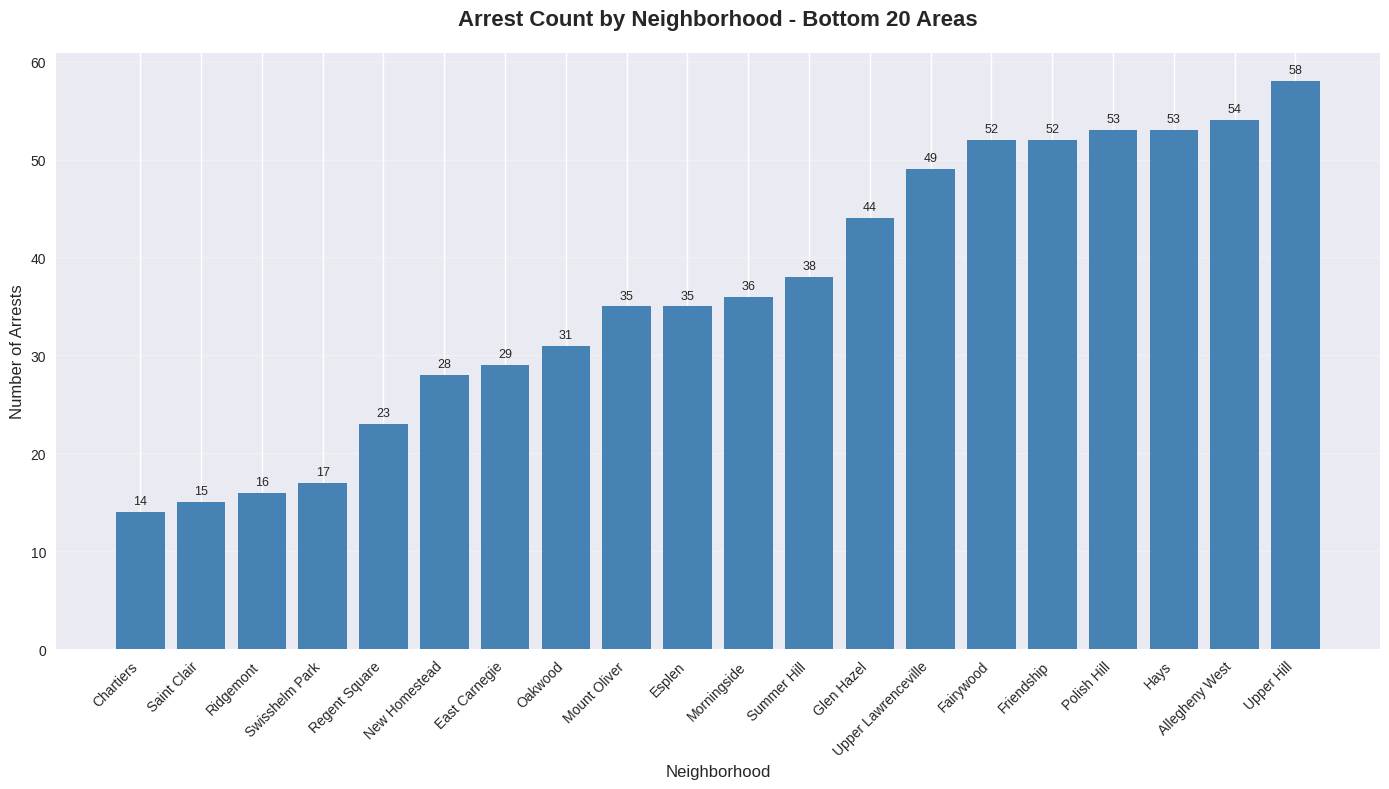

In [9]:
plt.style.use('seaborn-v0_8')

data = {
    'Neighborhood': [
        'Chartiers', 'Saint Clair', 'Ridgemont', 'Swisshelm Park', 'Regent Square',
        'New Homestead', 'East Carnegie', 'Oakwood', 'Mount Oliver', 'Esplen',
        'Morningside', 'Summer Hill', 'Glen Hazel', 'Upper Lawrenceville',
        'Fairywood', 'Friendship', 'Polish Hill', 'Hays', 'Allegheny West',
        'Upper Hill'
    ],
    'Count': [14, 15, 16, 17, 23, 28, 29, 31, 35, 35, 36, 38, 44, 49, 52, 52, 53, 53, 54, 58]
}


df = pd.DataFrame(data)

df_sorted = df.sort_values('Count', ascending=True)

plt.figure(figsize=(14, 8))

bars = plt.bar(df_sorted['Neighborhood'], df_sorted['Count'], 
               color='steelblue')  # 使用单一颜色

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.title('Arrest Count by Neighborhood - Bottom 20 Areas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)

plt.xticks(rotation=45, ha='right')


plt.grid(axis='y', alpha=0.3)

plt.tight_layout()


plt.show()


### Conclusion
<font size="4">This is the 15 lowest arrest count neighborhood. All these neighborhoods have similar arrest counts, which allows us to choose from many of these neighborhoods.</font>
<br>

## Average Air Pollution

<font size="4">To determine the best neighborhood in Pittsburgh, we analyzed average air pollution levels across different neighborhoods using data from the Allegheny County Air Quality Emissions dataset. This is a metric since it can impact a resident's health.</font>

### Steps

<font size="4">We calculated the average air pollution for each neighborhood by:</font>
1. <font size ="4">Grouping emissions by their geographic coordinates
2. <font size ="4">Sorting those geographic coordinates into their respective neighborhood
3. <font size ="4">Finding the average tons of pollutants per year for each neighborhood
4. <font size ="4">Identifying the lowest neighborhoods

### Results

In [11]:
df = pd.read_csv('AQEData.csv')

location_pollution = df.groupby(['lat', 'lon'])['tons_per_yr'].sum().reset_index()

location_pollution['neighborhood'] = location_pollution.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)

neighborhood_avg_pollution = location_pollution.groupby('neighborhood')['tons_per_yr'].mean().reset_index()

df['neighborhood'] = df.apply(
    lambda row: fpsnippets.geo_to_neighborhood(row['lat'], row['lon']),
    axis=1
)
report_counts = df.groupby('neighborhood').size().reset_index(name='num_reports')

neighborhood_stats = neighborhood_avg_pollution.merge(report_counts, on='neighborhood')
neighborhood_stats.columns = ['neighborhood', 'avg_tons_per_yr', 'num_reports']

# Filter for neighborhoods with at least 25 reports
neighborhood_stats_filtered = neighborhood_stats[neighborhood_stats['num_reports'] >= 25]

neighborhood_stats_sorted = neighborhood_stats_filtered.sort_values(by='avg_tons_per_yr', ascending=True)

print("Neighborhoods with the lowest average air pollution:")
print(neighborhood_stats_sorted.head(20))

Neighborhoods with the lowest average air pollution:
                 neighborhood  avg_tons_per_yr  num_reports
5                     Carrick         3.160000           31
14              Homewood West         3.160000           31
11                     Esplen         5.840000           26
24        Squirrel Hill South         7.630000           31
20         Point Breeze North       118.430000          130
27        Upper Lawrenceville       188.677800          171
15                    Larimer       534.410000          160
23           South Side Flats      1294.155000           66
17        Lower Lawrenceville      1451.656545          162
16   Lincoln-Lemington-Belmar      7444.010000           99
3                   Brookline      9437.223400          233
2                       Bluff     12648.700400          397
10              East Carnegie     12958.650000           40
1                  Bloomfield     15923.230000           66
9            Crawford-Roberts     16674.755915 

<font size = "4">What we can see is that our lowest average is Carrick at 3.16 tons per year.</font>

## THE BEST NEIGHBORHOOD (INITIAL RESULT, STILL WORKING ON FIGURING OUT SMALL POPULATION BIAS)

<font size="4">The best neighborhood between all three metrics has been different, but within our metrics, there is one neighborhood that stands out as best between the three. That neighborhood is **Esplen.** Esplen is placed eleventh for cleanliness, tenth for lowest arrest counts, and third for lowest average air pollution. This is a better result than any other neighborhood from our three metrics.</font>